# Dependencies

__`numpy
scipy
matplotlib
seaborn
networkx
moviepy
tqdm`__

In [5]:
%load_ext autoreload
% autoreload 2

In [21]:
from abm_model import *
# if using a dark theme for your jupyter notebook viewer, you may want to run this cell to make things visible
plt.style.use('seaborn-darkgrid')

# Arguments for run_automaton function:
- __`fit_land`__: Fitness landscape array of shape (2^N,). Used to define division rates of allele type. Maximum value of 1 means the cell type can divide once per generation.
- __`n_gen`__: an integer number of generations to simulate forward the ABM model [defaults to `40`]
- __`mut_rate`__: probability of mutation per generation [defaults to `0.01`]
- __`max_cells`__: Maximum number of cells. Cells will not divide after if max number reached. However, they continue to die and mutate. If more space created cells can divide again [defaults to `10^5`]
- __`death_rate`__: probability of mutation per generation [defaults to `0.05`]

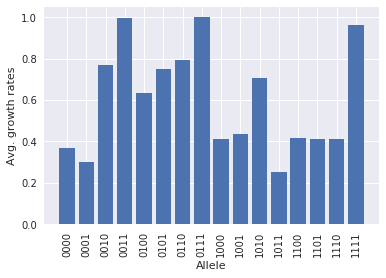

In [13]:
fit_land = np.array([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591])
fit_land /=fit_land.max()
plt.bar(np.arange(len(fit_land)), fit_land )
plt.ylabel('Avg. growth rates')
plt.xlabel('Allele')
ticks = [int_to_binary(mm) for mm in np.arange(len(fit_land))]
plt.xticks(np.arange(len(fit_land)), ticks, rotation=90);

### Run automaton here

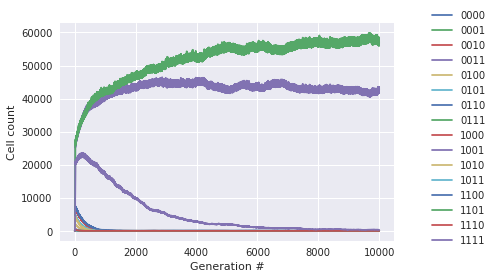

In [29]:
counts =run_automaton(fit_land,  n_gen = 10**4, mut_rate = 0.001, death_rate = 0.02 , max_cells=10**5)

for mm in range(len(fit_land)):
    plt.plot(np.arange(len(counts)), counts[:,mm], label=bin(mm)[2:].zfill(4) )

plt.legend(bbox_to_anchor=(1.3,1.1))
plt.xlabel('Generation #')
plt.ylabel('Cell count');

### Run vectorized automaton here

Vectorized version has extra parameters to account for noise in death and mutation rates

* __`death_noise`__ Standard deviation for death rate [defaults to `0.1`]
* __`mut_noise`__ Standar deviation for mutation rate [defaults to `0.05`]


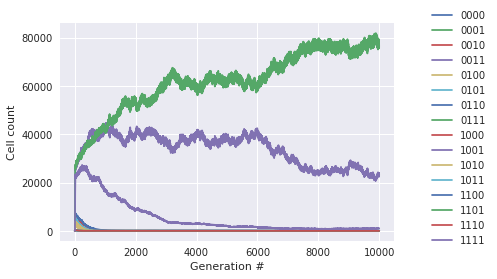

In [28]:
counts =vectorized_abm(fit_land,  n_gen = 10**4, mut_rate = 0.001, death_rate = 0.02 , max_cells=10**5,
                      mut_noise=0.001,
                      death_noise=0.005)

for mm in range(len(fit_land)):
    plt.plot(np.arange(len(counts)), counts[:,mm], label=bin(mm)[2:].zfill(4) )

plt.legend(bbox_to_anchor=(1.3,1.1))
plt.xlabel('Generation #')
plt.ylabel('Cell count');

### Animate the results

In [18]:
counts =run_automaton(fit_land,  n_gen = 40, mut_rate = 0.001, death_rate = 0.02 , max_cells=10**5)
animation, num_fps = animate_histogram(counts, num_fps = 10)
# animation.write_videofile('./animation.mp4', fps=num_fps) # export as video
# animation.write_gif( './animation.gif' , fps = num_fps ) #Slower
animation.ipython_display(fps=num_fps, loop=True, autoplay=True)

 98%|█████████▊| 41/42 [00:13<00:00,  2.96it/s]


ProcessLookupError: [Errno 3] No such process